# Diabetes Data

## Exploratory Data Analysis

In [1]:
# Importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random as rn
import warnings
warnings.filterwarnings('ignore')

### Reading and displaying the file

In [2]:
file = pd.read_csv('diabetes.csv')
file

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Looking at the datatypes

In [3]:
file.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Checking the column names

In [4]:
file.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Heatmap to check for correlations

<AxesSubplot:>

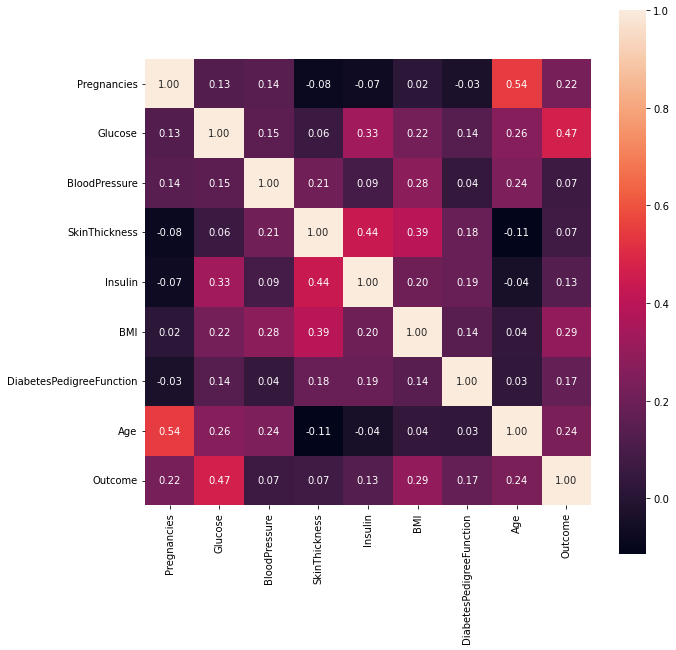

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(file.corr() , cbar = True,  square = True, annot = True, fmt = '.2f',annot_kws={'size': 10}, cmap= 'rocket')

### Checking for null values

In [6]:
# Number of null values in each column
file.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values

### General overview of the stats for each column

In [7]:
file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Other than for the columns 'Pregnancies' and 'Outcomes', a value of 0 does not make sense. So we need to replace those values with approximations.

### Replacing the 'zero' values

In [8]:
# Defining a function to plot histograms and print the values of mean and median

def forplotmeanmedian(variable):
    sns.distplot(file[variable][(file[variable]!=0) & (file['Outcome']!=0) ], kde = True, color='red')
    sns.distplot(file[variable][(file[variable]!=0) & (file['Outcome']==0) ], kde = True)
    plt.show()
    print('The red represents the patients and the blue the non-patients.')
    print('The mean of the', variable,'values is:', file[variable].mean())
    print('The median of the',variable, 'values is:', file[variable].median())

#### Glucose

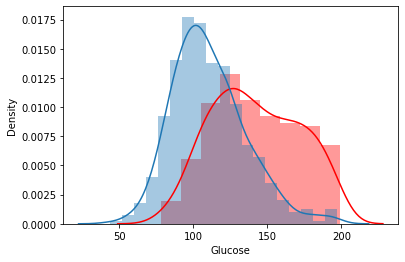

The red represents the patients and the blue the non-patients.
The mean of the Glucose values is: 120.89453125
The median of the Glucose values is: 117.0


In [9]:
forplotmeanmedian('Glucose')

*The mean and median are very close, so we replace the values of 0 with the mean.*

In [10]:
file['Glucose'].replace(0, file['Glucose'].mean(), inplace = True)

#### Blood pressure

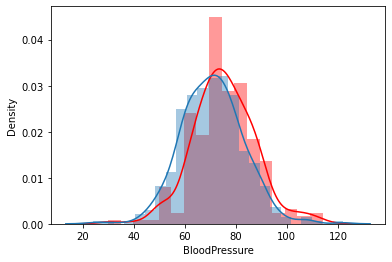

The red represents the patients and the blue the non-patients.
The mean of the BloodPressure values is: 69.10546875
The median of the BloodPressure values is: 72.0


In [11]:
forplotmeanmedian('BloodPressure')

*The mean and median are very close, so we replace the values of 0 with the mean.*

In [12]:
file['BloodPressure'].replace(0, file['BloodPressure'].mean(), inplace = True)

#### Skin thickness

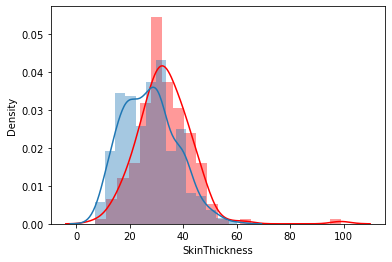

The red represents the patients and the blue the non-patients.
The mean of the SkinThickness values is: 20.536458333333332
The median of the SkinThickness values is: 23.0


In [13]:
forplotmeanmedian('SkinThickness')

*The mean and median are not very close, so we replace the values of 0 with the median.*

In [14]:
file['SkinThickness'].replace(0, file['SkinThickness'].median(), inplace = True)

#### Insulin

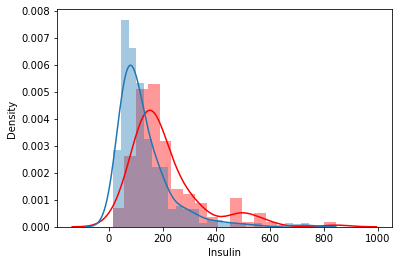

The red represents the patients and the blue the non-patients.
The mean of the Insulin values is: 79.79947916666667
The median of the Insulin values is: 30.5


In [15]:
forplotmeanmedian('Insulin')

*The mean is much larger than the median here. As the median is not skewed by outliers, we use the value of the median to replace the values of 0.*

In [16]:
file['Insulin'].replace(0, file['Insulin'].median(), inplace = True)

#### BMI

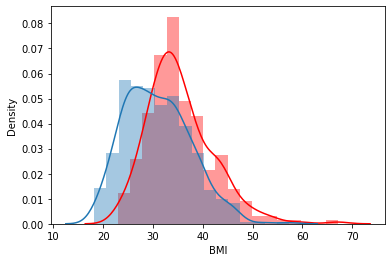

The red represents the patients and the blue the non-patients.
The mean of the BMI values is: 31.992578124999977
The median of the BMI values is: 32.0


In [17]:
forplotmeanmedian('BMI')

*The mean and median are very close, so we replace the values of 0 with the mean.*

In [18]:
file['BMI'].replace(0, file['BMI'].mean(), inplace = True)

### Dealing with outliers

#### Plotting a boxplot for every independent variable

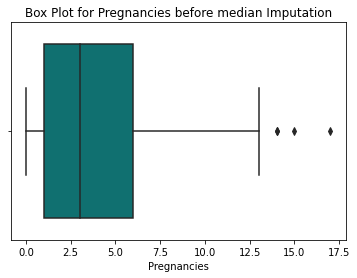

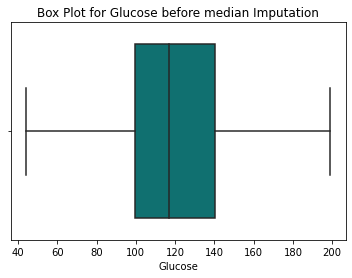

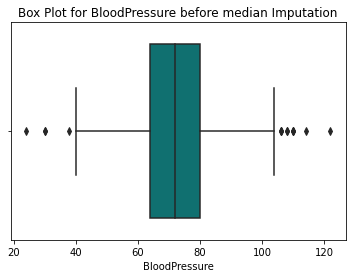

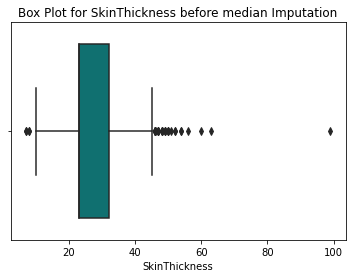

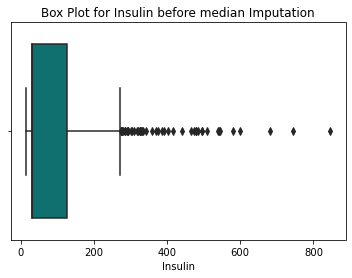

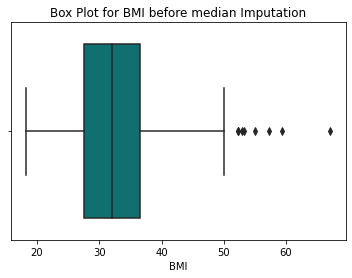

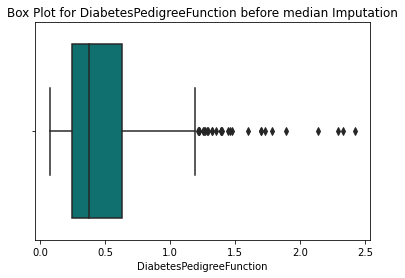

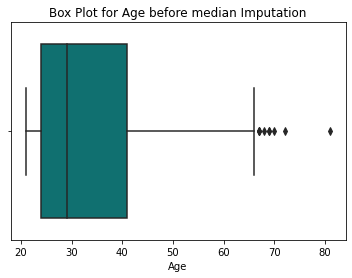

In [19]:
for column in file.columns[:-1]:
    sns.boxplot(x= file[column], color = 'teal')
    plt.title("Box Plot for " + column + " before median Imputation")
    plt.show()

#### Replacing the outliers with median, as the mean is skewed by outliers

In [20]:
for column in file.columns[:-1]:
    q1 = file[column].quantile(0.25)
    q3 = file[column].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(file[column])
    for i in file[column]:
        if i > Upper_tail or i < Lower_tail:
                file[column] = file[column].replace(i, med)

#### Plotting a boxplot for independent variables after imputation

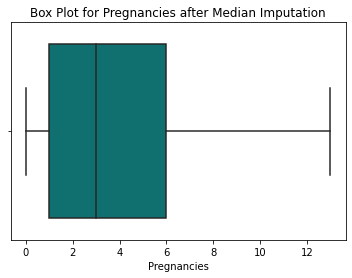

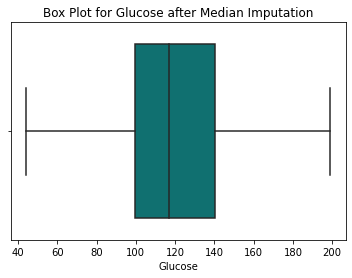

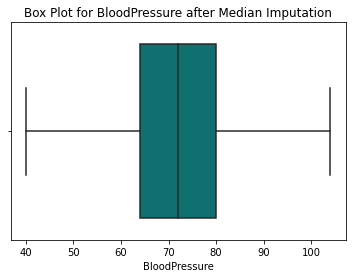

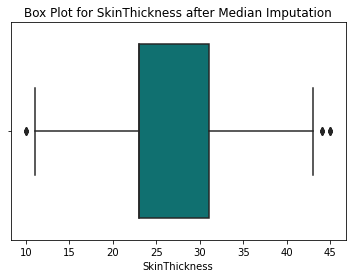

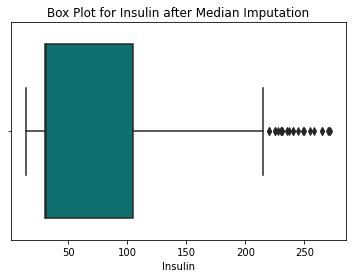

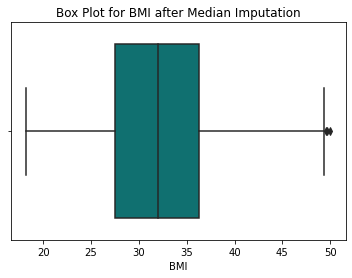

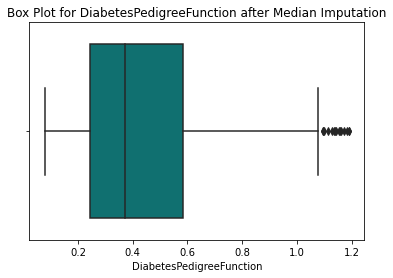

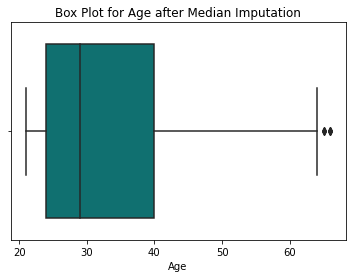

In [21]:
for column in file.columns[:-1]:
    sns.boxplot(x= file[column], color = 'teal')
    plt.title("Box Plot for " + column + " after Median Imputation")
    plt.show()

### Data visualisation

The number of patients is: 268
The number of non-patients is: 500


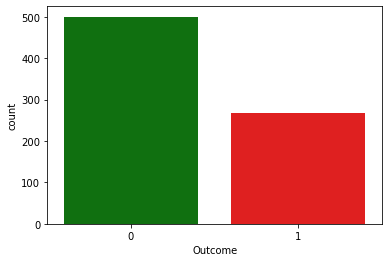

In [22]:
sns.countplot(data=file, x = 'Outcome', label='Count', palette=["green", "red"] )

print('The number of patients is:', file['Outcome'].value_counts()[1])
print('The number of non-patients is:', file['Outcome'].value_counts()[0])

The number of patients is only about a third of the total number of people. It is an unbalanced dataset.

### Pairplot of all the variables

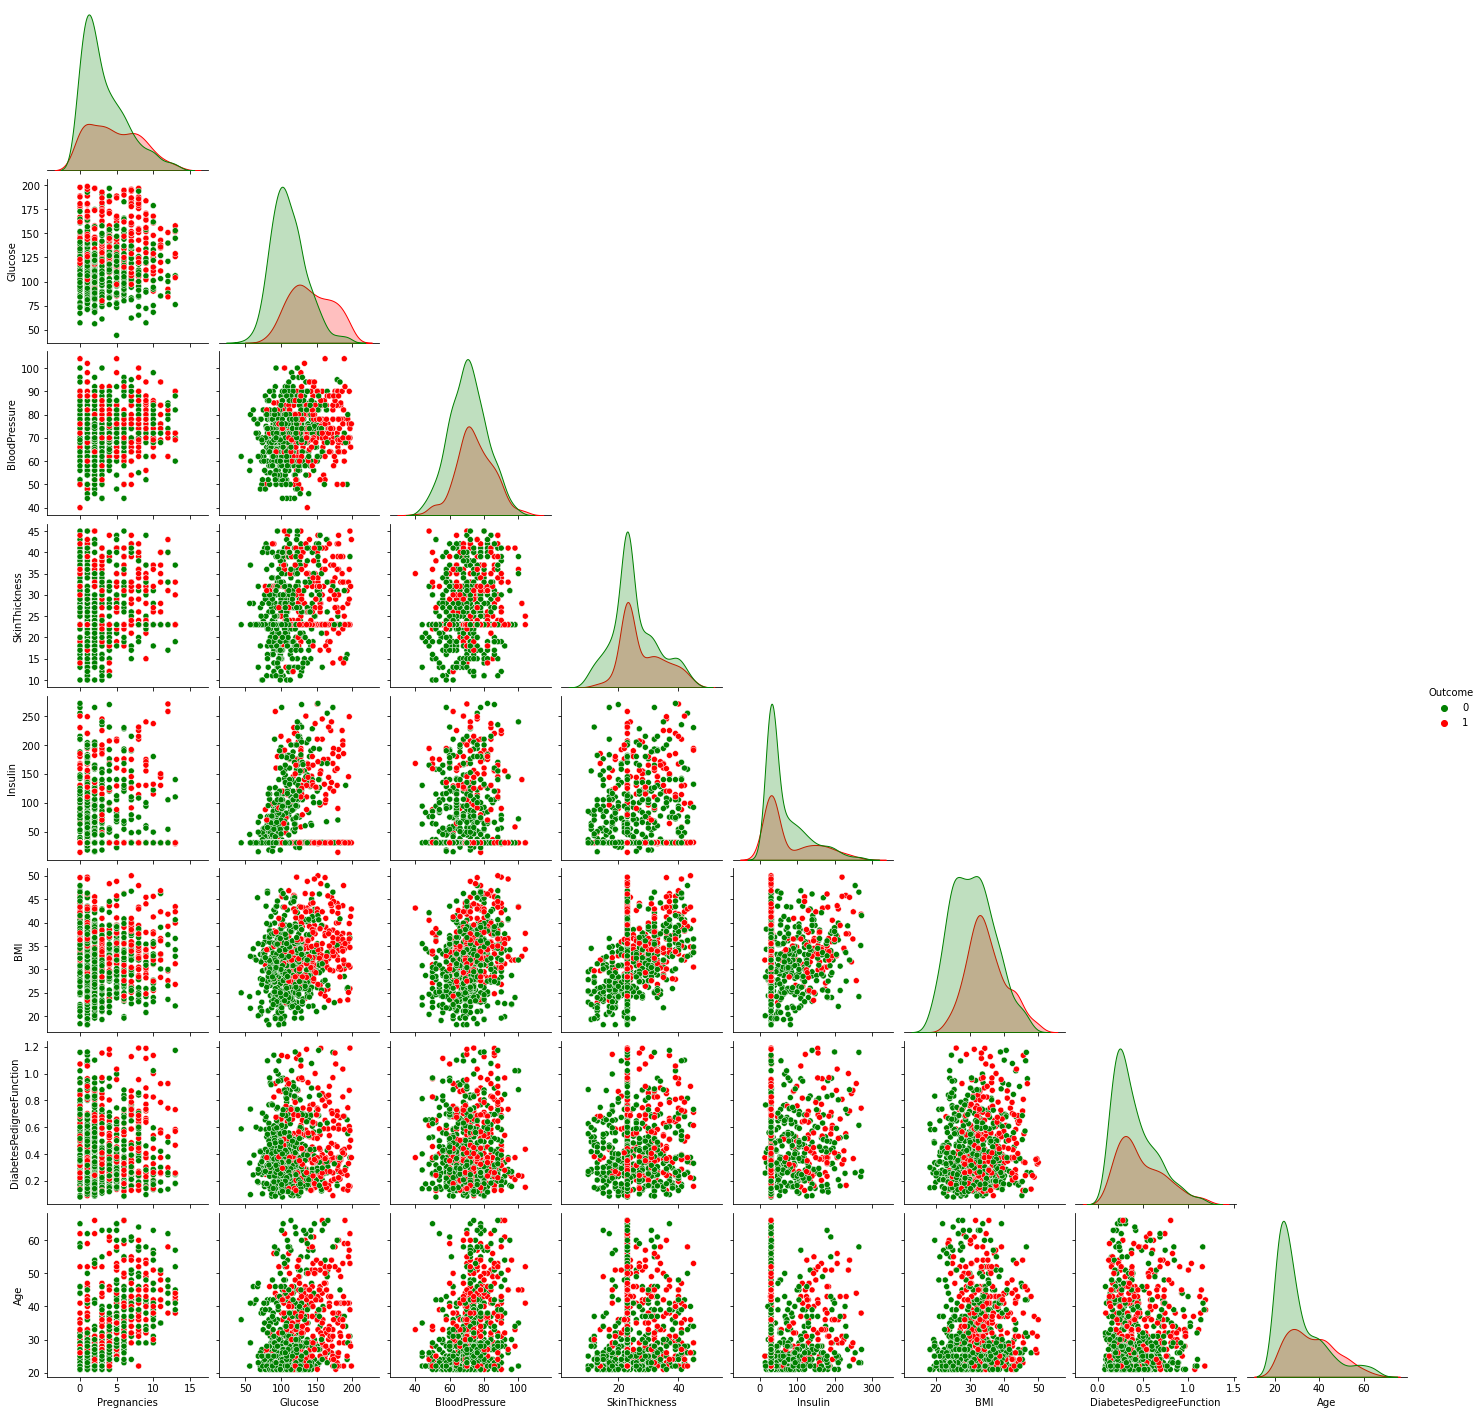

In [23]:
a = file[(file['Glucose']!=0) & (file['BloodPressure']!=0) & (file['SkinThickness']!=0) & (file['BMI']!=0) & (file['Insulin']!=0) & (file['DiabetesPedigreeFunction']!=0) & (file['Age']!=0)]
sns.pairplot(a, hue = 'Outcome', corner = True, palette = ['green','red'])

We see that the red and green values appear split to a degree for the variables Glucose and BMI. The demarcation is unclear for the other variables.<br>
We see that the insulin values are lower for women with larger pregnancy values. (There aren't many rows with high insulin in women with a large number of pregnancies.<br>
We see that insulin values are generally higher for higher glucose values. (There aren't many rows with high insulin and low glucose values.) <br>
We see that skin thickness appears to be correlated to the BMI.


### Heatmap to check the correlation after replacing values

<AxesSubplot:>

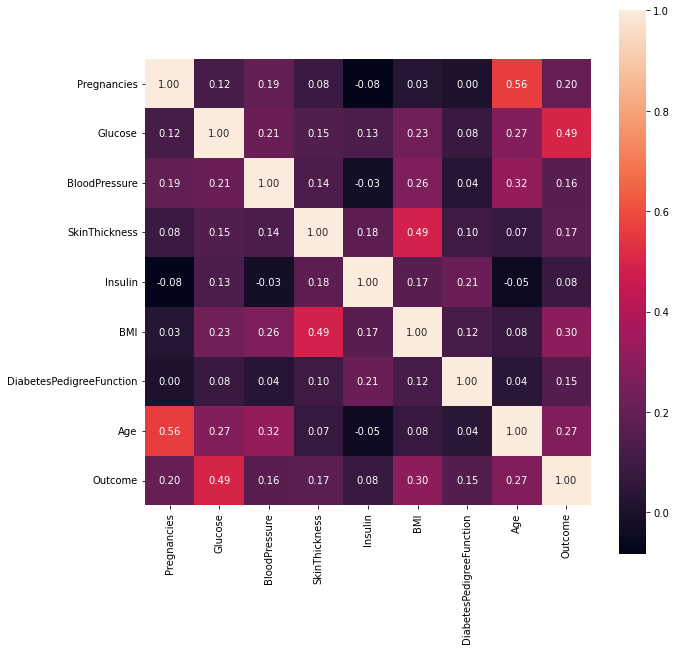

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(file.corr() , cbar = True,  square = True, annot = True, fmt = '.2f',annot_kws={'size': 10}, cmap= 'rocket')

#### The values above show that the most important variable in determining the outcome is Glucose. It is followed by BMI, Age, and the number of pregnancies.
#### We see that Age and Pregnancies are correlated to an extent, and so are BMI and skin thickness. We may choose to remove one variable of each pair, as multicollinearity might be a problem if that is not done. As the coefficients are not extrememly high, however, we can train the model using a combination of these variables to check which yields the best results.

# Tree based ML modelling

## Importing the necessary libraries

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV

In [26]:
# Separating the independent and dependent vaiables.
x = file[['Pregnancies', 'Age', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]
y = file['Outcome']
#x
#y

## Test-train split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 23)

## Feature scaling

In [28]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Printing metrics for each model

In [29]:
models = [DecisionTreeClassifier(random_state = 23),
          RandomForestClassifier(random_state = 23),
          ExtraTreesClassifier(random_state = 23),
          AdaBoostClassifier(random_state = 23),
          GradientBoostingClassifier(random_state = 23),
          XGBClassifier(eval_metric = 'error'),
          LGBMClassifier(random_state = 23)]

In [30]:
ModelName = []
AccuracyScore = []
KFoldMeanAccuracy = []
StandardDeviation = []
Precision = []
Recall = []
F1 = []
ROC_AUC = []

for model in models:
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    #cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    
    em = ''
    whnm = 0
    while str(model)[whnm] != '(':
        em = em + str(model)[whnm]
        whnm += 1
    
    ModelName.append(em)
    AccuracyScore.append(accuracy_score(y_test, y_pred))
    KFoldMeanAccuracy.append(accuracies.mean()*100)
    StandardDeviation.append(accuracies.std()*100)
    Precision.append(precision)
    Recall.append(recall)
    F1.append(f1)
    ROC_AUC.append(roc)


In [31]:
ModelStats = pd.DataFrame()
ModelStats['ModelName'] = ModelName
ModelStats['AccuracyScore'] = AccuracyScore
ModelStats['KFoldMeanAccuracy'] = KFoldMeanAccuracy
ModelStats['StandardDeviation'] = StandardDeviation
ModelStats['Precision'] = Precision
ModelStats['Recall'] = Recall
ModelStats['F1'] = F1
ModelStats['ROC_AUC'] = ROC_AUC

In [32]:
ModelStats

,ModelName,AccuracyScore,KFoldMeanAccuracy,StandardDeviation,Precision,Recall,F1,ROC_AUC
0,DecisionTreeClassifier,0.701299,68.088313,5.584125,0.550725,0.716981,0.622951,0.705025
1,RandomForestClassifier,0.818182,74.925965,4.215336,0.745098,0.716981,0.730769,0.794134
2,ExtraTreesClassifier,0.811688,75.089900,5.262091,0.730769,0.716981,0.723810,0.789184
3,AdaBoostClassifier,0.753247,71.509783,5.210726,0.636364,0.660377,0.648148,0.731179
4,GradientBoostingClassifier,0.805195,72.982549,4.274327,0.725490,0.698113,0.711538,0.779750
5,XGBClassifier,0.811688,72.485457,3.529560,0.714286,0.754717,0.733945,0.798151
6,LGBMClassifier,0.824675,72.826547,5.809608,0.740741,0.754717,0.747664,0.808052


#### LGBM has the best accuracy score, closely followed by random forest, and then  by XGB and ExtraTrees. All four of them have a large AUC, with LGBM having the best AUC. The downside of using LGBM is that is has a high standard deviation. XGB has the lowest standard deviation of these four models.

## Tuning the models

In [33]:
grid_models = [(DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[23]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[23]}]),
               (ExtraTreesClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[23]}]),
               (AdaBoostClassifier(),[{'n_estimators':[100,150,200],'learning_rate':[0.1, 0.5, 0.8, 1],'algorithm':['SAMME', 'SAMME.R'], 'random_state':[23]}]),
               (GradientBoostingClassifier(),[{'n_estimators':[100,150,200],'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[23]}]),
               (LGBMClassifier(),[{'n_estimators':[100,150,200],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[23]}]),
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [34]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('\n----------------\n')

DecisionTreeClassifier():
Best Accuracy : 71.02%
Best Parameters :  {'criterion': 'entropy', 'random_state': 23}

----------------

RandomForestClassifier():
Best Accuracy : 75.42%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 150, 'random_state': 23}

----------------

ExtraTreesClassifier():
Best Accuracy : 76.72%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 150, 'random_state': 23}

----------------

AdaBoostClassifier():
Best Accuracy : 77.19%
Best Parameters :  {'algorithm': 'SAMME', 'learning_rate': 0.8, 'n_estimators': 150, 'random_state': 23}

----------------

GradientBoostingClassifier():
Best Accuracy : 74.60%
Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100, 'random_state': 23}

----------------

LGBMClassifier():
Best Accuracy : 73.30%
Best Parameters :  {'learning_rate': 0.8, 'n_estimators': 150, 'random_state': 23}

----------------

XGBClassifier(base_score=None, booster=None, 

## Final metrics with the best hyperparameters for each model

In [35]:
list1 = [] # To note ROC AUC scores for each model
list2 = [] # To note accuracy values for each model

### Decision Tree

Classification report:
_______________________________________________________
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       101
           1       0.60      0.70      0.64        53

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154
 
_______________________________________________________

Accuracy Score:  0.7337662337662337 
_______________________________________________________

Confusion matrix:


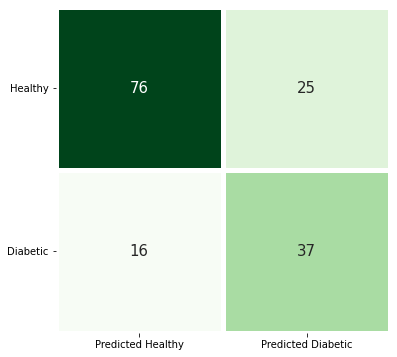

_______________________________________________________

ROC AUC score: 0.7252942275359612
_______________________________________________________

ROC AUC Curve:


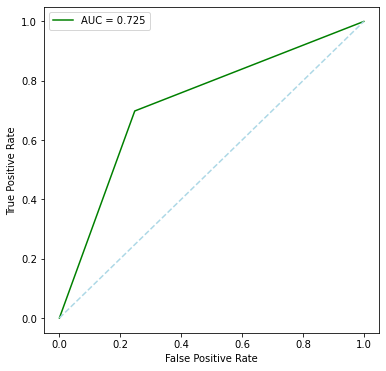

_______________________________________________________

Precision Recall Curve:


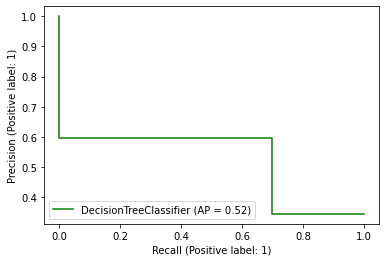

In [36]:
#Fitting DecisionTreeClassifier Model
clf = DecisionTreeClassifier(criterion= 'entropy', random_state= 23)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

# Classification report
print('Classification report:\n_______________________________________________________\n',
      classification_report(y_test, y_pred),'\n_______________________________________________________\n')

# Accuracy Score
print('Accuracy Score: ',accuracy_score(y_test, y_pred),'\n_______________________________________________________\n')
list2.append(accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
print('Confusion matrix:')
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Greens', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()
print('_______________________________________________________\n')

print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
list1.append(roc_auc_score(y_test, y_prob))
print('_______________________________________________________\n')
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('ROC AUC Curve:')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = 'green', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'lightblue')
plt.axis('tight') # Fits the plot so that all values are seen
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
print('_______________________________________________________\n')

#Precision Recall Curve
print('Precision Recall Curve:')
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(clf, x_test, y_test, color = 'green')
plt.show()

### Random Forest

Classification report:
_______________________________________________________
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       101
           1       0.76      0.77      0.77        53

    accuracy                           0.84       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.84      0.84      0.84       154
 
_______________________________________________________

Accuracy Score:  0.8376623376623377 
_______________________________________________________

Confusion matrix:


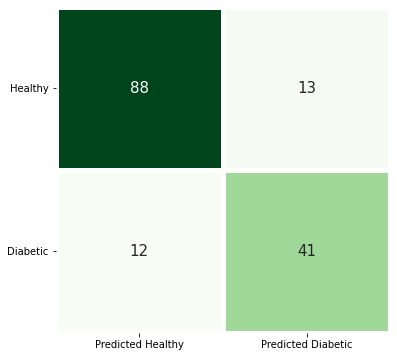

_______________________________________________________

ROC AUC score: 0.8784793573696993
_______________________________________________________

ROC AUC Curve:


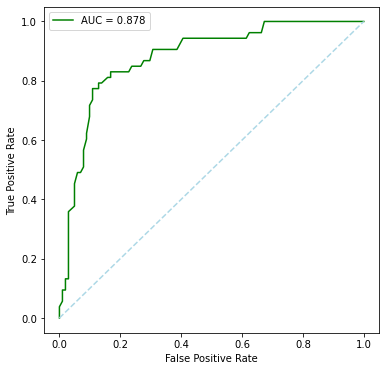

_______________________________________________________

Precision Recall Curve:


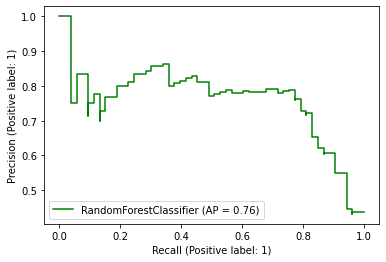

In [37]:
#Fitting DecisionTreeClassifier Model
clf = RandomForestClassifier(criterion= 'entropy', random_state= 23, n_estimators = 150)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

# Classification report
print('Classification report:\n_______________________________________________________\n',
      classification_report(y_test, y_pred),'\n_______________________________________________________\n')

# Accuracy Score
print('Accuracy Score: ',accuracy_score(y_test, y_pred),'\n_______________________________________________________\n')
list2.append(accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
print('Confusion matrix:')
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Greens', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()
print('_______________________________________________________\n')

print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
list1.append(roc_auc_score(y_test, y_prob))
print('_______________________________________________________\n')
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('ROC AUC Curve:')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = 'green', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'lightblue')
plt.axis('tight') # Fits the plot so that all values are seen
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
print('_______________________________________________________\n')

#Precision Recall Curve
print('Precision Recall Curve:')
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(clf, x_test, y_test, color = 'green')
plt.show()

### Extra Trees

Classification report:
_______________________________________________________
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       101
           1       0.76      0.74      0.75        53

    accuracy                           0.83       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.83      0.83      0.83       154
 
_______________________________________________________

Accuracy Score:  0.8311688311688312 
_______________________________________________________

Confusion matrix:


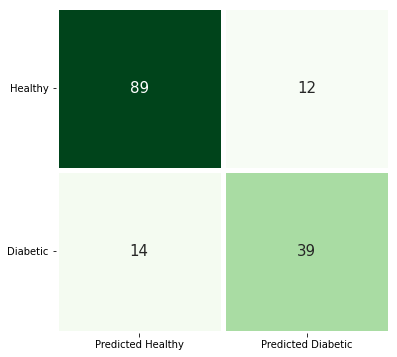

_______________________________________________________

ROC AUC score: 0.8734354567532224
_______________________________________________________

ROC AUC Curve:


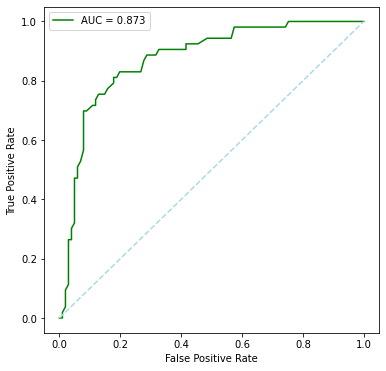

_______________________________________________________

Precision Recall Curve:


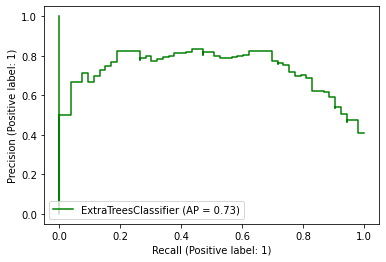

In [38]:
#Fitting DecisionTreeClassifier Model
clf = ExtraTreesClassifier(criterion= 'entropy', random_state= 23, n_estimators = 150)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

# Classification report
print('Classification report:\n_______________________________________________________\n',
      classification_report(y_test, y_pred),'\n_______________________________________________________\n')

# Accuracy Score
print('Accuracy Score: ',accuracy_score(y_test, y_pred),'\n_______________________________________________________\n')
list2.append(accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
print('Confusion matrix:')
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Greens', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()
print('_______________________________________________________\n')

print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
list1.append(roc_auc_score(y_test, y_prob))
print('_______________________________________________________\n')
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('ROC AUC Curve:')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = 'green', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'lightblue')
plt.axis('tight') # Fits the plot so that all values are seen
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
print('_______________________________________________________\n')

#Precision Recall Curve
print('Precision Recall Curve:')
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(clf, x_test, y_test, color = 'green')
plt.show()

### AdaBoost

Classification report:
_______________________________________________________
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       101
           1       0.74      0.60      0.67        53

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154
 
_______________________________________________________

Accuracy Score:  0.7922077922077922 
_______________________________________________________

Confusion matrix:


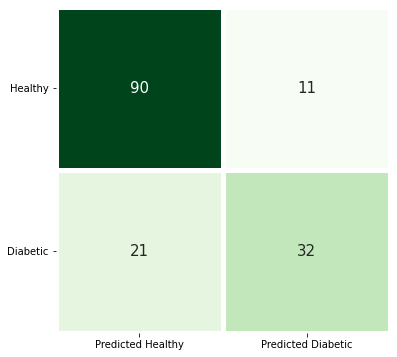

_______________________________________________________

ROC AUC score: 0.8394358303754903
_______________________________________________________

ROC AUC Curve:


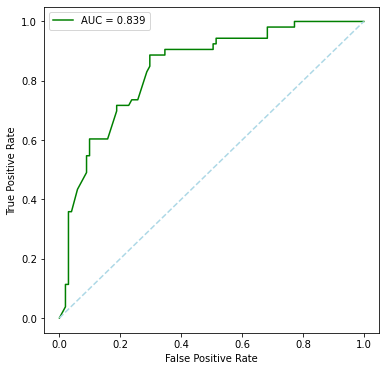

_______________________________________________________

Precision Recall Curve:


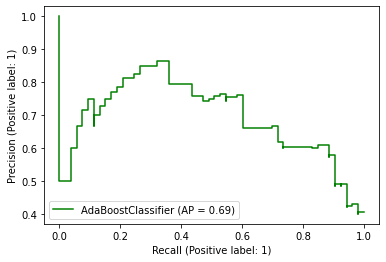

In [39]:
#Fitting DecisionTreeClassifier Model
clf = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 0.8, n_estimators = 150, random_state= 23)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

# Classification report
print('Classification report:\n_______________________________________________________\n',
      classification_report(y_test, y_pred),'\n_______________________________________________________\n')

# Accuracy Score
print('Accuracy Score: ',accuracy_score(y_test, y_pred),'\n_______________________________________________________\n')
list2.append(accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
print('Confusion matrix:')
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Greens', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()
print('_______________________________________________________\n')

print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
list1.append(roc_auc_score(y_test, y_prob))
print('_______________________________________________________\n')
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('ROC AUC Curve:')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = 'green', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'lightblue')
plt.axis('tight') # Fits the plot so that all values are seen
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
print('_______________________________________________________\n')

#Precision Recall Curve
print('Precision Recall Curve:')
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(clf, x_test, y_test, color = 'green')
plt.show()

### Gradient boosting

Classification report:
_______________________________________________________
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       101
           1       0.74      0.79      0.76        53

    accuracy                           0.83       154
   macro avg       0.81      0.82      0.82       154
weighted avg       0.84      0.83      0.83       154
 
_______________________________________________________

Accuracy Score:  0.8311688311688312 
_______________________________________________________

Confusion matrix:


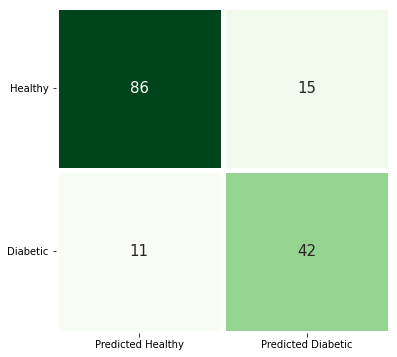

_______________________________________________________

ROC AUC score: 0.871473939846815
_______________________________________________________

ROC AUC Curve:


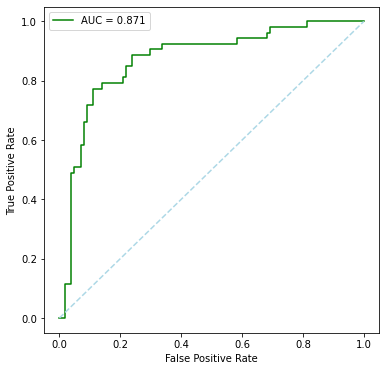

_______________________________________________________

Precision Recall Curve:


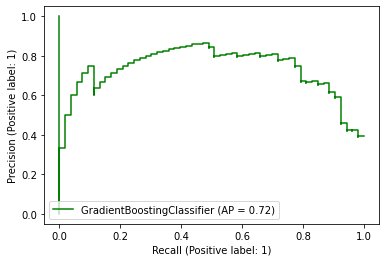

In [40]:
 {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100, 'random_state': 23}
#Fitting DecisionTreeClassifier Model
clf = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.1, n_estimators = 100, loss = 'exponential', random_state= 23)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

# Classification report
print('Classification report:\n_______________________________________________________\n',
      classification_report(y_test, y_pred),'\n_______________________________________________________\n')

# Accuracy Score
print('Accuracy Score: ',accuracy_score(y_test, y_pred),'\n_______________________________________________________\n')
list2.append(accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
print('Confusion matrix:')
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Greens', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()
print('_______________________________________________________\n')

print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
list1.append(roc_auc_score(y_test, y_prob))
print('_______________________________________________________\n')
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('ROC AUC Curve:')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = 'green', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'lightblue')
plt.axis('tight') # Fits the plot so that all values are seen
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
print('_______________________________________________________\n')

#Precision Recall Curve
print('Precision Recall Curve:')
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(clf, x_test, y_test, color = 'green')
plt.show()

### LightGBM

Classification report:
_______________________________________________________
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       101
           1       0.67      0.70      0.69        53

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154
 
_______________________________________________________

Accuracy Score:  0.7792207792207793 
_______________________________________________________

Confusion matrix:


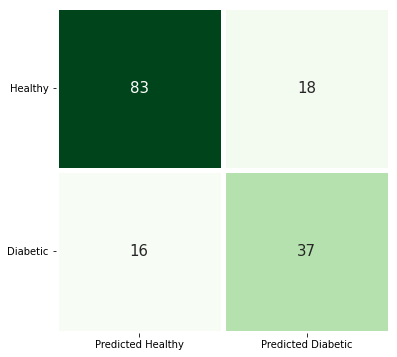

_______________________________________________________

ROC AUC score: 0.8441995142910517
_______________________________________________________

ROC AUC Curve:


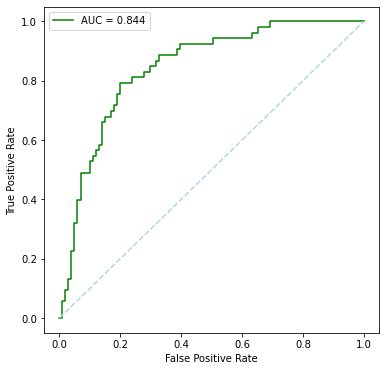

_______________________________________________________

Precision Recall Curve:


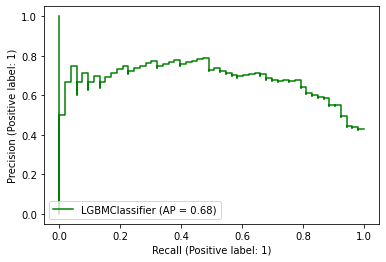

In [41]:
#Fitting DecisionTreeClassifier Model
clf = LGBMClassifier(learning_rate = 0.8, n_estimators = 150, random_state= 23)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

# Classification report
print('Classification report:\n_______________________________________________________\n',
      classification_report(y_test, y_pred),'\n_______________________________________________________\n')

# Accuracy Score
print('Accuracy Score: ',accuracy_score(y_test, y_pred),'\n_______________________________________________________\n')
list2.append(accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
print('Confusion matrix:')
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Greens', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()
print('_______________________________________________________\n')

print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
list1.append(roc_auc_score(y_test, y_prob))
print('_______________________________________________________\n')
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('ROC AUC Curve:')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = 'green', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'lightblue')
plt.axis('tight') # Fits the plot so that all values are seen
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
print('_______________________________________________________\n')

#Precision Recall Curve
print('Precision Recall Curve:')
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(clf, x_test, y_test, color = 'green')
plt.show()

### XGBoost

Classification report:
_______________________________________________________
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       101
           1       0.76      0.77      0.77        53

    accuracy                           0.84       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.84      0.84      0.84       154
 
_______________________________________________________

Accuracy Score:  0.8376623376623377 
_______________________________________________________

Confusion matrix:


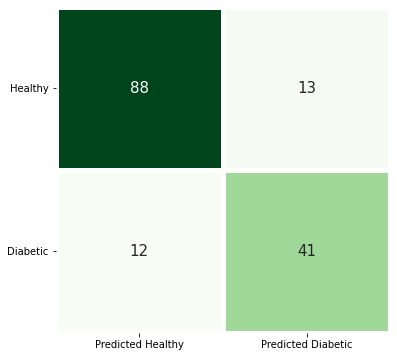

_______________________________________________________

ROC AUC score: 0.8630674388193537
_______________________________________________________

ROC AUC Curve:


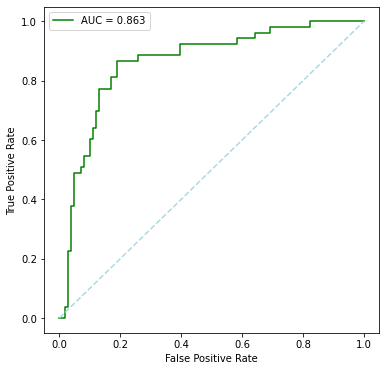

_______________________________________________________

Precision Recall Curve:


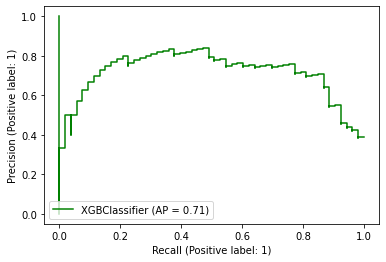

In [42]:
#Fitting DecisionTreeClassifier Model
clf = XGBClassifier(eval_metric = 'error', learning_rate = 0.1)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

# Classification report
print('Classification report:\n_______________________________________________________\n',
      classification_report(y_test, y_pred),'\n_______________________________________________________\n')

# Accuracy Score
print('Accuracy Score: ',accuracy_score(y_test, y_pred),'\n_______________________________________________________\n')
list2.append(accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
print('Confusion matrix:')
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Greens', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()
print('_______________________________________________________\n')

print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
list1.append(roc_auc_score(y_test, y_prob))
print('_______________________________________________________\n')
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('ROC AUC Curve:')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = 'green', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'lightblue')
plt.axis('tight') # Fits the plot so that all values are seen
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
print('_______________________________________________________\n')

#Precision Recall Curve
print('Precision Recall Curve:')
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(clf, x_test, y_test, color = 'green')
plt.show()

In [43]:
# nfl = pd.DataFrame()
# nfl['Models'] = ModelStats['ModelName']
# nfl['ROCAUCScore'] = list1
# nfl['AccuracyScore'] = list2
# nfl

## Conclusion

#### We see that Random Forest gives us the best results. Extra Trees, Gradient boosting, and LGBM also give us results that are not worse than Random Forest by a large degree.